\title{myHDL to PYNQ Fabric Only Exsample}
\author{Steven K Armour}
\maketitle

# Refrances

# Libraries and Helper functions

In [8]:
from myhdl import *
from myhdlpeek import Peeker
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sympy import *
init_printing()

import random

#https://github.com/jrjohansson/version_information
%load_ext version_information
%version_information myhdl, myhdlpeek, numpy, pandas, matplotlib, sympy, random

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software,Version
Python,3.6.5 64bit [GCC 7.2.0]
IPython,6.4.0
OS,Linux 4.15.0 30 generic x86_64 with debian buster sid
myhdl,0.10
myhdlpeek,0.0.7
numpy,1.14.3
pandas,0.23.0
matplotlib,2.2.2
sympy,1.1.1
random,The 'random' distribution was not found and is required by the application


In [9]:
#helper  functions to read in the .v and .vhd generated files into python
def VerilogTextReader(loc, printresult=True):
    with open(f'{loc}.v', 'r') as vText:
        VerilogText=vText.read()
    if printresult:
        print(f'***Verilog modual from {loc}.v***\n\n', VerilogText)
    return VerilogText

def VHDLTextReader(loc, printresult=True):
    with open(f'{loc}.vhd', 'r') as vText:
        VerilogText=vText.read()
    if printresult:
        print(f'***VHDL modual from {loc}.vhd***\n\n', VerilogText)
    return VerilogText

# Project 1: 1 Switch 1 LED
https://timetoexplore.net/blog/arty-fpga-verilog-01

## Constraints File

## myHDL Code

In [10]:
@block
def S0L0(sw, clk, led):
    """
    FPGA Hello world of one switch controlling one LED based on
    https://timetoexplore.net/blog/arty-fpga-verilog-01
    
    Target:
        ZYNQ 7000 Board (Arty, PYNQ-Z1, PYNQ-Z2) with at least 2 
        switchs and 4 leds
    
    
    Input:
        sw(2bitVec):switch input
        clk(bool): clock input    
    Ouput:
        led(4bitVec): led output
        
    """
    
    @always(clk.posedge)
    def logic():
        if sw[0]==0:
            led.next[0]=True
        else:
            led.next[0]=False
    
    return instances()

## myHDL Testing

In [11]:
Peeker.clear()
clk=Signal(bool(0)); Peeker(clk, 'clk')
sw=Signal(intbv(0)[2:]); Peeker(sw, 'sw')
led=Signal(intbv(0)[4:]); Peeker(led, 'led')

np.random.seed(18)
swTVals=[int(i) for i in np.random.randint(0,2, 10)]

DUT=S0L0(sw, clk, led)

def S0L0_TB():
    
    @always(delay(1))
    def ClkGen():
        clk.next=not clk
        
    @instance
    def stimules():
        for i in range(10):
            sw.next[0]=swTVals[i]
            yield clk.posedge
        raise StopSimulation()
    
    return instances()
            
sim=Simulation(DUT, S0L0_TB(), *Peeker.instances()).run()

In [12]:
Peeker.to_wavedrom()

In [13]:
Peeker.to_dataframe()

,clk,led,sw
0,0,0,0
1,1,1,1
2,0,1,1
3,1,0,0
4,0,0,0
5,1,1,1
6,0,1,1
7,1,0,0
8,0,0,0
9,1,1,1


## Verilog Code

In [7]:
DUT.convert()
VerilogTextReader('S0L0');

***Verilog modual from S0L0.v***

 // File: S0L0.v
// Generated by MyHDL 0.10
// Date: Wed Aug 22 22:56:10 2018


`timescale 1ns/10ps

module S0L0 (
    sw,
    clk,
    led
);
// FPGA Hello world of one switch controlling one LED based on
// https://timetoexplore.net/blog/arty-fpga-verilog-01
// 
// Target:
//     ZYNQ 7000 Board (Arty, PYNQ-Z1, PYNQ-Z2) with at least 2 
//     switchs and 4 leds
// 
// 
// Input:
//     sw(2bitVec):switch input
//     clk(bool): clock input    
// Ouput:
//     led(4bitVec): led output
//     

input [1:0] sw;
input clk;
output [3:0] led;
reg [3:0] led;




always @(posedge clk) begin: S0L0_LOGIC
    if ((sw[0] == 0)) begin
        led[0] <= 1'b1;
    end
    else begin
        led[0] <= 1'b0;
    end
end

endmodule



\begin{figure}
\centerline{\includegraphics[width=10cm]{S0L0_RTL.png}}
\caption{\label{fig:S0L0RTL} S0L0 RTL schematic; Xilinx Vivado 2017.4}
\end{figure}

\begin{figure}
\centerline{\includegraphics[width=10cm]{S0L0_SYN.png}}
\caption{\label{fig:S0L0SYN} S0L0 Synthesized Schematic; Xilinx Vivado 2017.4}
\end{figure}

\begin{figure}
\centerline{\includegraphics[width=10cm]{S0L0_SYN.png}}
\caption{\label{fig:S0L0SYN} S0L0 Implementated Schematic; Xilinx Vivado 2017.4}
\end{figure}

## PYNQ-Z1 Constraints File
Below is what is found in file `constrs_S0L0.xdc`

Notice that the orgianl port names found in the PYNQ-Z1 Constraints file have been changed to the port names of the module `S0L0`

## Verilog Testbench

In [8]:
swTVal=intbv(int(''.join([str(i) for i in swTVals]), 2))[len(swTVals):]
print(f'swTest: {swTVals}, {swTVal}, {[int(i) for i in swTVal]}')


swTest: [0, 1, 0, 1, 0, 1, 0, 0, 0, 0], 150, [0, 1, 0, 1, 0, 1, 0, 0, 0, 0]


In [9]:
@block
def S0L0_TBV():
    clk=Signal(bool(0))
    sw=Signal(intbv(0)[2:])
    led=Signal(intbv(0)[4:])
    
    #test stimuli
    swTVals=Signal(swTVal)
    
    @always_comb
    def print_data():
        print(sw, clk, led)


    DUT=S0L0(sw, clk, led)
    
    @instance
    def clk_signal():
        while True:
            clk.next = not clk
            yield delay(1)
        
    @instance
    def stimules():
        for i in range(10):
            sw.next[0]=swTVals[i]
            yield clk.posedge
        raise StopSimulation()
    
    return instances()
            
TB=S0L0_TBV()
TB.convert(hdl="Verilog", initial_values=True)
VerilogTextReader('S0L0_TBV');

<class 'myhdl._Signal._Signal'> <class '_ast.Name'>
<class 'myhdl._Signal._Signal'> <class '_ast.Name'>
<class 'myhdl._Signal._Signal'> <class '_ast.Name'>
***Verilog modual from S0L0_TBV.v***

 // File: S0L0_TBV.v
// Generated by MyHDL 0.10
// Date: Sun Aug 19 18:05:54 2018


`timescale 1ns/10ps

module S0L0_TBV (

);



reg clk = 0;
reg [1:0] sw = 0;
reg [3:0] led = 0;
wire [9:0] swTVals;

assign swTVals = 10'd336;


always @(clk, sw, led) begin: S0L0_TBV_PRINT_DATA
    $write("%h", sw);
    $write(" ");
    $write("%h", clk);
    $write(" ");
    $write("%h", led);
    $write("\n");
end


always @(posedge clk) begin: S0L0_TBV_S0L00_0_LOGIC
    if ((sw[0] == 0)) begin
        led[0] <= 1'b1;
    end
    else begin
        led[0] <= 1'b0;
    end
end


initial begin: S0L0_TBV_CLK_SIGNAL
    while (1'b1) begin
        clk <= (!clk);
        # 1;
    end
end


initial begin: S0L0_TBV_STIMULES
    integer i;
    for (i=0; i<10; i=i+1) begin
        sw[0] <= swTVals[i];
        @(posedge 

/home/iridium/anaconda3/lib/python3.6/site-packages/myhdl/conversion/_toVerilog.py:349: ToVerilogWarning: Signal is not driven: swTVals
  category=ToVerilogWarning


## Board Verification

# Project 2: 2 Switchs 4 LEDS
https://timetoexplore.net/blog/arty-fpga-verilog-01

## myHDL Code

In [10]:
@block
def S2L4(sw, clk, led):
    """
    FPGA Hello world of two switchs controlling four LED based on
    https://timetoexplore.net/blog/arty-fpga-verilog-01
    
    Target:
        ZYNQ 7000 Board (Arty, PYNQ-Z1, PYNQ-Z2) with at least 2 
        switchs and 4 leds
    
    
    Input:
        sw(2bitVec):switch input
        clk(bool): clock input    
    Ouput:
        led(4bitVec): led output
        
    """

    
    @always(clk.posedge)
    def logic():
        if sw[0]==0:
            led.next[2:]=0
        else:
            led.next[2:]=3
            
        if sw[1]==0:
            led.next[4:2]=0
        else:
            led.next[4:2]=3
    
    return instances()

## myHDL Testing

In [11]:
Peeker.clear()
clk=Signal(bool(0)); Peeker(clk, 'clk')
sw=Signal(intbv(0)[2:]); Peeker(sw, 'sw')
led=Signal(intbv(0)[4:]); Peeker(led, 'led')

np.random.seed(18)
swTVals=[int(i) for i in np.random.randint(0,4, 10)]

DUT=S2L4(sw, clk, led)

def S2L4_TB():
    
    @always(delay(1))
    def ClkGen():
        clk.next=not clk
        
    @instance
    def stimules():
        for i in range(10):
            sw.next=swTVals[i]
            yield clk.posedge
        raise StopSimulation()
    
    return instances()
            
sim=Simulation(DUT, S2L4_TB(), *Peeker.instances()).run()

In [12]:
Peeker.to_wavedrom()

In [13]:
Peeker.to_dataframe()

,clk,led,sw
0,0,0,2
1,1,12,3
2,0,12,3
3,1,15,0
4,0,15,0
5,1,0,1
6,0,0,1
7,1,3,2
8,0,3,2
9,1,12,1


## Verilog Code

In [14]:
DUT.convert()
VerilogTextReader('S2L4');

***Verilog modual from S2L4.v***

 // File: S2L4.v
// Generated by MyHDL 0.10
// Date: Sun Aug 19 18:05:54 2018


`timescale 1ns/10ps

module S2L4 (
    sw,
    clk,
    led
);
// FPGA Hello world of two switchs controlling four LED based on
// https://timetoexplore.net/blog/arty-fpga-verilog-01
// 
// Target:
//     ZYNQ 7000 Board (Arty, PYNQ-Z1, PYNQ-Z2) with at least 2 
//     switchs and 4 leds
// 
// 
// Input:
//     sw(2bitVec):switch input
//     clk(bool): clock input    
// Ouput:
//     led(4bitVec): led output
//     

input [1:0] sw;
input clk;
output [3:0] led;
reg [3:0] led;




always @(posedge clk) begin: S2L4_LOGIC
    if ((sw[0] == 0)) begin
        led[2-1:0] <= 0;
    end
    else begin
        led[2-1:0] <= 3;
    end
    if ((sw[1] == 0)) begin
        led[4-1:2] <= 0;
    end
    else begin
        led[4-1:2] <= 3;
    end
end

endmodule



\begin{figure}
\centerline{\includegraphics[width=10cm]{S2L4_RTL.png}}
\caption{\label{fig:S2L4RTL} S2L4 RTL schematic; Xilinx Vivado 2017.4}
\end{figure}

\begin{figure}
\centerline{\includegraphics[width=10cm]{S2L4_SYN.png}}
\caption{\label{fig:S2L4SYN} S2L4 Synthesized Schematic; Xilinx Vivado 2017.4}
\end{figure}

\begin{figure}
\centerline{\includegraphics[width=10cm]{S2L4_IMP.png}}
\caption{\label{fig:S2L4SYN} S2L4 Implementated Schematic; Xilinx Vivado 2017.4}
\end{figure}

## Verilog Testbench (ToDo)
will write later when testbench conversion is improved

## PYNQ-Z1 Constraints File
using same one as in **1 Switch 1 LED**: `constrs_S0L0.xdc`

## Board Verification

# Project 3: Countdown

## myHDL Code

In [15]:
@block
def countLED(clk, led):
    counter=Signal(modbv(0)[33:])
    
    @always(clk.posedge)
    def logic():
        counter.next=counter+1
        led.next[0]=counter[26]
        led.next[1]=counter[24]
        led.next[3]=counter[22]
        led.next[4]=counter[20]
    
    return instances()

## myHDL Testing

In [16]:
Peeker.clear()
clk=Signal(bool(0)); Peeker(clk, 'clk')
led=Signal(intbv(0)[4:]); Peeker(led, 'led')


DUT=countLED(clk, led)

'''
def countLED_TB():
    
    @always(delay(1))
    def ClkGen():
        clk.next=not clk
        
    @instance
    def stimules():
        i=0
        while True:
            if i==2**33:
                raise StopSimulation()
            if 1%100==0:
                print(i)
            i+=1
            yield clk.posedge
    
    return instances()
            
sim=Simulation(DUT, countLED_TB(), *Peeker.instances()).run()
'''
;

''

Need to figure out how to write/run these long simulations better in python 

## Verilog Code

In [17]:
DUT.convert()
VerilogTextReader('countLED');

***Verilog modual from countLED.v***

 // File: countLED.v
// Generated by MyHDL 0.10
// Date: Sun Aug 19 18:05:54 2018


`timescale 1ns/10ps

module countLED (
    clk,
    led
);


input clk;
output [3:0] led;
reg [3:0] led;

reg [32:0] counter = 0;



always @(posedge clk) begin: COUNTLED_LOGIC
    counter <= (counter + 1);
    led[0] <= counter[26];
    led[1] <= counter[24];
    led[3] <= counter[22];
    led[4] <= counter[20];
end

endmodule



## Verilog Testbench

## PYNQ-Z1 Constraints File
Below is what is found in file `constrs_S0L0.xdc`

Notice that the orgianl port names found in the PYNQ-Z1 Constraints file have been changed to the port names of the module `S0L0`

## Board Verification

# Project 4: Basic Duty Cycle
https://timetoexplore.net/blog/arty-fpga-verilog-02

## myHDL Code

In [18]:
@block
def BDCLed(clk, led):
    counter=Signal(modbv(0)[8:])
    duty_led=Signal(modbv(8)[8:])
    
    @always(clk.posedge)
    def logic():
        counter.next=counter+1
        if counter<duty_led:
            led.next=15
        else:
            led.next=0
    
    return instances()

## myHDL Testing

In [26]:
Peeker.clear()
clk=Signal(bool(0)); Peeker(clk, 'clk')
led=Signal(intbv(0)[4:]); Peeker(led, 'led')

DUT=BDCLed(clk, led)
    
def BDCLed_TB():
    
    @always(delay(1))
    def ClkGen():
        clk.next=not clk
        
    @instance
    def stimules():
        i=0
        while True:
            if i==1000:
                raise StopSimulation()
            i+=1
            yield clk.posedge
    
    return instances()
            
sim=Simulation(DUT, BDCLed_TB(), *Peeker.instances()).run()

In [27]:
Peeker.to_wavedrom()

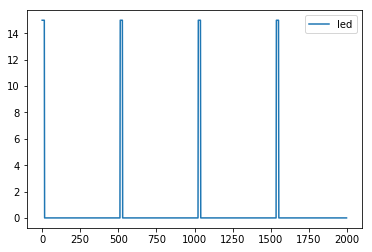

In [28]:
BDCLedData=Peeker.to_dataframe()
BDCLedData=BDCLedData[BDCLedData['clk']==1]
BDCLedData.plot(y='led');

## Verilog Code

In [30]:
DUT.convert()
VerilogTextReader('BDCLed');

***Verilog modual from BDCLed.v***

 // File: BDCLed.v
// Generated by MyHDL 0.10
// Date: Sun Aug 19 18:11:00 2018


`timescale 1ns/10ps

module BDCLed (
    clk,
    led
);


input clk;
output [3:0] led;
reg [3:0] led;

wire [7:0] duty_led;
reg [7:0] counter = 0;

assign duty_led = 8'd8;


always @(posedge clk) begin: BDCLED_LOGIC
    counter <= (counter + 1);
    if ((counter < duty_led)) begin
        led <= 15;
    end
    else begin
        led <= 0;
    end
end

endmodule



/home/iridium/anaconda3/lib/python3.6/site-packages/myhdl/conversion/_toVerilog.py:349: ToVerilogWarning: Signal is not driven: duty_led
  category=ToVerilogWarning


## PYNQ-Z1 Constraints File
Below is what is found in file `constrs_S0L0.xdc`

Notice that the orgianl port names found in the PYNQ-Z1 Constraints file have been changed to the port names of the module `S0L0`

## Verilog Testbench

In [31]:
@block
def BDCLed_TBV():

    clk=Signal(bool(0))
    led=Signal(intbv(0)[4:])
    
    @always_comb
    def print_data():
        print(sw, clk, led)

    DUT=BDCLed(clk, led)
    
    
    @instance
    def clk_signal():
        while True:
            clk.next = not clk
            yield delay(1)
        
    @instance
    def stimules():
        i=0
        while True:
            if i==1000:
                raise StopSimulation()
            i+=1
            yield clk.posedge
    
    return instances()
            
TB=BDCLed_TBV()
TB.convert(hdl="Verilog", initial_values=True)
VerilogTextReader('BDCLed_TBV');

<class 'myhdl._Signal._Signal'> <class '_ast.Name'>
<class 'myhdl._Signal._Signal'> <class '_ast.Name'>
<class 'myhdl._Signal._Signal'> <class '_ast.Name'>
***Verilog modual from BDCLed_TBV.v***

 // File: BDCLed_TBV.v
// Generated by MyHDL 0.10
// Date: Sun Aug 19 18:16:51 2018


`timescale 1ns/10ps

module BDCLed_TBV (

);



reg clk = 0;
wire [1:0] sw;
reg [3:0] led = 0;
wire [7:0] BDCLed0_0_duty_led;
reg [7:0] BDCLed0_0_counter = 0;

assign sw = 2'd0;
assign BDCLed0_0_duty_led = 8'd8;


always @(clk, sw, led) begin: BDCLED_TBV_PRINT_DATA
    $write("%h", sw);
    $write(" ");
    $write("%h", clk);
    $write(" ");
    $write("%h", led);
    $write("\n");
end


always @(posedge clk) begin: BDCLED_TBV_BDCLED0_0_LOGIC
    BDCLed0_0_counter <= (BDCLed0_0_counter + 1);
    if ((BDCLed0_0_counter < BDCLed0_0_duty_led)) begin
        led <= 15;
    end
    else begin
        led <= 0;
    end
end


initial begin: BDCLED_TBV_CLK_SIGNAL
    while (1'b1) begin
        clk <= (!clk);
       

/home/iridium/anaconda3/lib/python3.6/site-packages/myhdl/conversion/_toVerilog.py:349: ToVerilogWarning: Signal is not driven: sw
  category=ToVerilogWarning
/home/iridium/anaconda3/lib/python3.6/site-packages/myhdl/conversion/_toVerilog.py:349: ToVerilogWarning: Signal is not driven: BDCLed0_0_duty_led
  category=ToVerilogWarning


## Board Verification

# Project 5: Mid level PWM LED

## pwm myHDL Code

In [32]:
@block
def pwm(clk, dutyCount, o_state):
    counter=Signal(modbv(0)[8:])
    
    @always(clk.posedge)
    def logic():
        counter.next=counter+1
        o_state.next=counter<dutyCount
    
    return instances()

## pwm myHDL Testing

In [33]:
Peeker.clear()
clk=Signal(bool(0)); Peeker(clk, 'clk')
dutyCount=Signal(intbv(4)[8:]); Peeker(dutyCount, 'dutyCount')
o_state=Signal(bool(0)); Peeker(o_state, 'o_state')

DUT=pwm(clk, dutyCount, o_state)

def pwm_TB():
    pass

## pwm Verilog Code